<a href="https://colab.research.google.com/github/Apoo05/Introduction-au-deep-learning/blob/main/rnn%2Cgru%2Cbi_not_that_bi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,SimpleRNN
from keras.utils import to_categorical,plot_model
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#compute the number of labels
num_labels=len(np.unique(y_train))
num_labels

10

In [ ]:
#CONVERT TO ONE-HOT VECTOR
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x_train.shape#60000 images with size 28*28

(60000, 28, 28)

In [ ]:
#resize and normalize
image_size=x_train.shape[1]
x_train=np.reshape(x_train,[-1,image_size,image_size])
print(x_train.shape)
x_test=np.reshape(x_test,[-1,image_size,image_size])
print(x_test.shape)
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#network parameters
input_shape=(image_size,image_size)
batch_size=128
units=28
dropout=0.2

In [ ]:
#model is RNN with 256 units,input-28dim vector with 28 timesteps
model=Sequential()
model.add(SimpleRNN(units=units,input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 28)                1596      
                                                                 
 dense (Dense)               (None, 10)                290       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 1,886
Trainable params: 1,886
Non-trainable params: 0
_________________________________________________________________


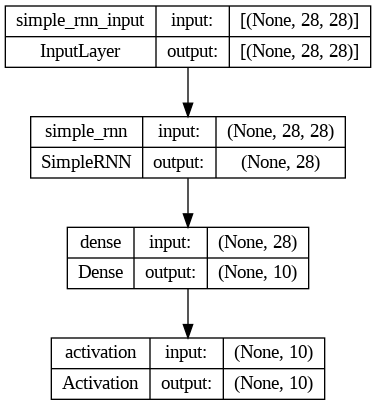

In [ ]:
plot_model(model,to_file='rnn-mnist.png',show_shapes=True)

In [ ]:
#to compile the model
model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 8ms/step - loss: 1.2040 - accuracy: 0.5974
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.6403 - accuracy: 0.7957
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4904 - accuracy: 0.8502
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4265 - accuracy: 0.8720
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3831 - accuracy: 0.8882
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3513 - accuracy: 0.8967
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3268 - accuracy: 0.9043
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.3112 - accuracy: 0.9084
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2961 - accuracy: 0.9133
Epoch 10/20
469/469 [==============================] - 7s 15ms/step - loss: 0.2843 - accuracy: 0.

In [ ]:
loss,acc=model.evaluate(x_test,y_test,batch_size=batch_size)
print("\nTest accuracy:%.1f%%" % (100.0*acc))

79/79 [==============================] - 1s 4ms/step - loss: 0.2195 - accuracy: 0.9361

Test accuracy:93.6%


##**GOOGLE STOCK PRICE PREDICTION USING RNN**

In [ ]:
import pandas as pd
dataset_train=pd.read_csv("/content/Google_Stock_Price_Train - Google_Stock_Price_Train.csv")

In [ ]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
dataset_test=pd.read_csv("/content/Google_Stock_Price_Test - Google_Stock_Price_Test.csv")
dataset_test

,Date,Open,High,Low,Close,Volume
0,01-03-2017,778.81,789.63,775.80,786.14,"16,57,300"
1,01-04-2017,788.36,791.34,783.16,786.90,"10,73,000"
2,01-05-2017,786.08,794.48,785.02,794.02,"13,35,200"
3,01-06-2017,795.26,807.90,792.20,806.15,"16,40,200"
4,01-09-2017,806.40,809.97,802.83,806.65,"12,72,400"
5,01-10-2017,807.86,809.13,803.51,804.79,"11,76,800"
6,01-11-2017,805.00,808.15,801.37,807.91,"10,65,900"
7,01-12-2017,807.14,807.39,799.17,806.36,"13,53,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"10,99,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"13,62,100"


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [ ]:
dataset_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
dataset_test.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
#Time prediction based on one column
d_train=dataset_train.iloc[:, 1:2]
d_train

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [ ]:
#column to array format
d_train=dataset_train.iloc[:, 1:2].values
d_train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
#minmaxscaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(d_train)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
#splits into 60[1 to 59 as train,60 th as test,2to 61 as train,61 as test]
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
#reshaping- add dimension in numpy array
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor=Sequential()

In [ ]:
from keras.layers import Dense,SimpleRNN
regressor.add(SimpleRNN(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import Callback
regressor.add(SimpleRNN(units=50,return_sequences=False,input_shape=(x_train.shape[1],1)))
regressor.add(Dense(32,activation='relu'))
regressor.add(Dense(1))



In [ ]:
regressor.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['mse'])

In [ ]:
regressor.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 3s 30ms/step - loss: 0.0299 - mse: 0.0299
Epoch 2/20
38/38 [==============================] - 2s 57ms/step - loss: 0.0103 - mse: 0.0103
Epoch 3/20
38/38 [==============================] - 2s 44ms/step - loss: 0.0079 - mse: 0.0079
Epoch 4/20
38/38 [==============================] - 2s 54ms/step - loss: 0.0061 - mse: 0.0061
Epoch 5/20
38/38 [==============================] - 2s 41ms/step - loss: 0.0050 - mse: 0.0050
Epoch 6/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0043 - mse: 0.0043
Epoch 7/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0038 - mse: 0.0038
Epoch 8/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0031 - mse: 0.0031
Epoch 9/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0033 - mse: 0.0033
Epoch 10/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0031 - mse: 0.0031
Epoch 11/20
38/38 [==============================] - 1s 33m

In [ ]:
real_stock_price=dataset_test.iloc[:,1:2].values

In [ ]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,01-03-2017,778.81,789.63,775.80,786.14,"16,57,300"
1,01-04-2017,788.36,791.34,783.16,786.90,"10,73,000"
2,01-05-2017,786.08,794.48,785.02,794.02,"13,35,200"
3,01-06-2017,795.26,807.90,792.20,806.15,"16,40,200"
4,01-09-2017,806.40,809.97,802.83,806.65,"12,72,400"
5,01-10-2017,807.86,809.13,803.51,804.79,"11,76,800"
6,01-11-2017,805.00,808.15,801.37,807.91,"10,65,900"
7,01-12-2017,807.14,807.39,799.17,806.36,"13,53,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"10,99,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"13,62,100"


In [ ]:
dataset_total=pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs=dataset_total[len(dataset_total)- len(dataset_test)- 60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)


In [ ]:
x_test= np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


In [ ]:
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price =sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 577ms/step


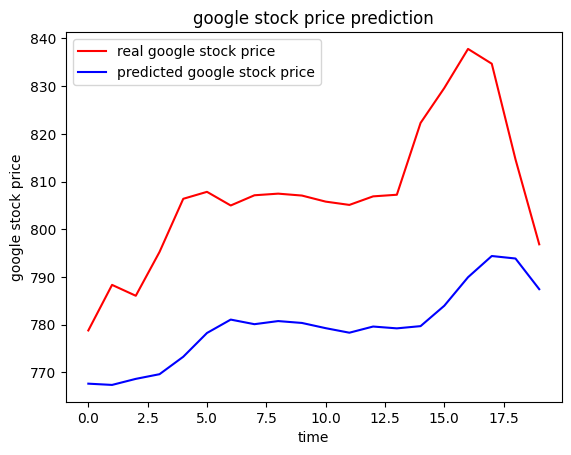

In [ ]:
plt.plot(real_stock_price,color='red',label="real google stock price")
plt.plot(predicted_stock_price, color="blue",label='predicted google stock price')
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.legend()
plt.show()

In [ ]:
time_steps=45
import tensorflow as tf
from tensorflow.keras.layers import Dense,  Dropout,Input,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
model=Sequential()
model.add(Input(shape=(time_steps,1)))
model.add(LSTM(48,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(48,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(48))
model.add(Dropout(0.2))
model.add(Dense(1,activation="relu"))

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=['mse'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 1s 24ms/step - loss: 0.0056 - mse: 0.0056
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0056 - mse: 0.0056
Epoch 3/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0056 - mse: 0.0056
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0056 - mse: 0.0056
Epoch 5/20
38/38 [==============================] - 1s 15ms/step - loss: 0.0056 - mse: 0.0056
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0056 - mse: 0.0056
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.0056 - mse: 0.0056
Epoch 8/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0056 - mse: 0.0056
Epoch 9/20
38/38 [==============================] - 0s 3ms/step - loss: 0.0056 - mse: 0.0056
Epoch 10/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0056 - mse: 0.0056
Epoch 11/20
38/38 [==============================] - 0s 3ms/step -

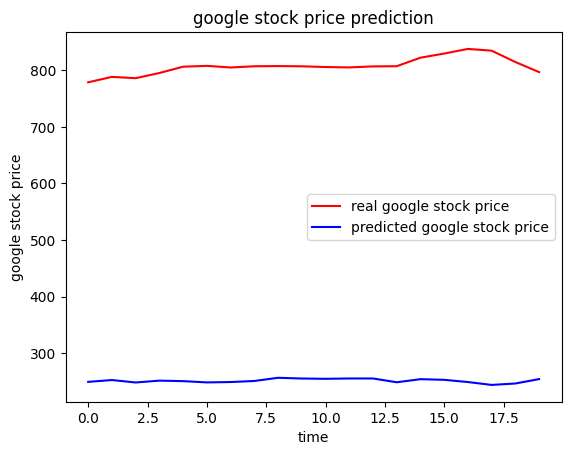

In [ ]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price,color='red',label="real google stock price")
plt.plot(predicted_stock_price, color="blue",label='predicted google stock price')
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.legend()
plt.show()

#GRU-Gated Recurrent Units

In [ ]:
from tensorflow.keras.layers import Dense,  Dropout,Input,LSTM,GRU
model=Sequential()
model.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=['mse'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 16s 158ms/step - loss: 0.0401 - mse: 0.0401
Epoch 2/20
38/38 [==============================] - 8s 215ms/step - loss: 0.0058 - mse: 0.0058
Epoch 3/20
38/38 [==============================] - 5s 141ms/step - loss: 0.0050 - mse: 0.0050
Epoch 4/20
38/38 [==============================] - 6s 158ms/step - loss: 0.0043 - mse: 0.0043
Epoch 5/20
38/38 [==============================] - 6s 159ms/step - loss: 0.0046 - mse: 0.0046
Epoch 6/20
38/38 [==============================] - 5s 135ms/step - loss: 0.0041 - mse: 0.0041
Epoch 7/20
38/38 [==============================] - 7s 193ms/step - loss: 0.0036 - mse: 0.0036
Epoch 8/20
38/38 [==============================] - 5s 139ms/step - loss: 0.0037 - mse: 0.0037
Epoch 9/20
38/38 [==============================] - 7s 187ms/step - loss: 0.0037 - mse: 0.0037
Epoch 10/20
38/38 [==============================] - 6s 150ms/step - loss: 0.0036 - mse: 0.0036
Epoch 11/20
38/38 [=============================

1/1 [==============================] - 1s 1s/step


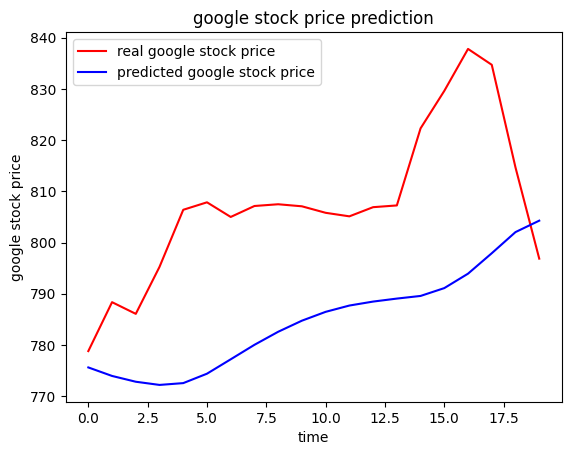

In [ ]:
predicted_stock_price=model.predict(x_test)
predicted_stock_price =sc.inverse_transform(predicted_stock_price)
import matplotlib.pyplot as plt
plt.plot(real_stock_price,color='red',label="real google stock price")
plt.plot(predicted_stock_price, color="blue",label='predicted google stock price')
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.legend()
plt.show()

#BIDIRECTIONAL LSTM

In [ ]:
from tensorflow.keras.layers import Dense,  Dropout,Input,LSTM,GRU,Bidirectional,Embedding
model=Sequential()
model.add(Embedding(input_dim=10000,output_dim=128))
model.add(Bidirectional(LSTM(units=64,return_sequences=True)))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=['mse'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 18s 218ms/step - loss: 0.0747 - mse: 0.0747
Epoch 2/20
38/38 [==============================] - 9s 247ms/step - loss: 0.0745 - mse: 0.0745
Epoch 3/20
38/38 [==============================] - 7s 180ms/step - loss: 0.0744 - mse: 0.0744
Epoch 4/20
38/38 [==============================] - 9s 228ms/step - loss: 0.0745 - mse: 0.0745
Epoch 5/20
38/38 [==============================] - 8s 199ms/step - loss: 0.0744 - mse: 0.0744
Epoch 6/20
38/38 [==============================] - 9s 227ms/step - loss: 0.0743 - mse: 0.0743
Epoch 7/20
38/38 [==============================] - 9s 236ms/step - loss: 0.0753 - mse: 0.0753
Epoch 8/20
38/38 [==============================] - 7s 180ms/step - loss: 0.0744 - mse: 0.0744
Epoch 9/20
38/38 [==============================] - 8s 218ms/step - loss: 0.0739 - mse: 0.0739
Epoch 10/20
38/38 [==============================] - 10s 261ms/step - loss: 0.0735 - mse: 0.0735
Epoch 11/20
38/38 [============================

1/1 [==============================] - 4s 4s/step


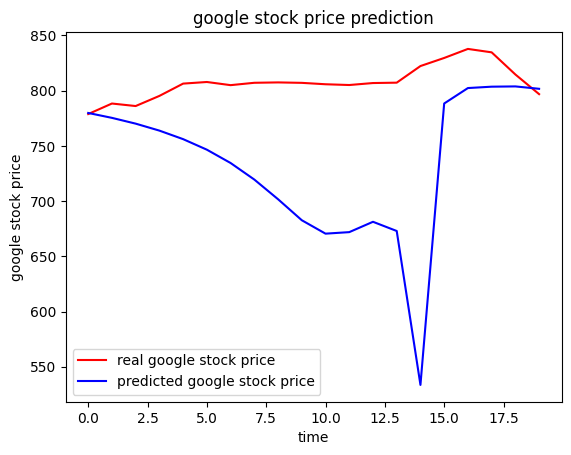

In [ ]:
predicted_stock_price=model.predict(x_test)
predicted_stock_price =sc.inverse_transform(predicted_stock_price)
import matplotlib.pyplot as plt
plt.plot(real_stock_price,color='red',label="real google stock price")
plt.plot(predicted_stock_price, color="blue",label='predicted google stock price')
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.legend()
plt.show()

In [ ]:
#BIDIRECTIONAL LSTM
from tensorflow.keras.layers import Dense,  Dropout,Input,LSTM,GRU,Bidirectional,Embedding,BatchNormalization
window_size=60
model=Sequential()
model.add(Bidirectional(LSTM(100,return_sequences=True,activation='relu',input_shape=(1,window_size))))
model.add(Bidirectional(LSTM(50,return_sequences=True,dropout=0.5)))
model.add(Bidirectional(LSTM(50,dropout=0.5)))
model.add(BatchNormalization(momentum=0.6))
model.add(Dense(1))

In [ ]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=['mse'])

In [ ]:
model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 36s 467ms/step - loss: 0.1714 - mse: 0.1714
Epoch 2/20
38/38 [==============================] - 13s 335ms/step - loss: 0.0138 - mse: 0.0138
Epoch 3/20
38/38 [==============================] - 11s 293ms/step - loss: 0.0091 - mse: 0.0091
Epoch 4/20
38/38 [==============================] - 11s 287ms/step - loss: 0.0073 - mse: 0.0073
Epoch 5/20
38/38 [==============================] - 13s 348ms/step - loss: 0.0069 - mse: 0.0069
Epoch 6/20
38/38 [==============================] - 11s 287ms/step - loss: 0.0050 - mse: 0.0050
Epoch 7/20
38/38 [==============================] - 10s 266ms/step - loss: 0.0046 - mse: 0.0046
Epoch 8/20
38/38 [==============================] - 10s 262ms/step - loss: 0.0060 - mse: 0.0060
Epoch 9/20
38/38 [==============================] - 11s 294ms/step - loss: 0.0049 - mse: 0.0049
Epoch 10/20
38/38 [==============================] - 12s 308ms/step - loss: 0.0043 - mse: 0.0043
Epoch 11/20
38/38 [====================

1/1 [==============================] - 4s 4s/step


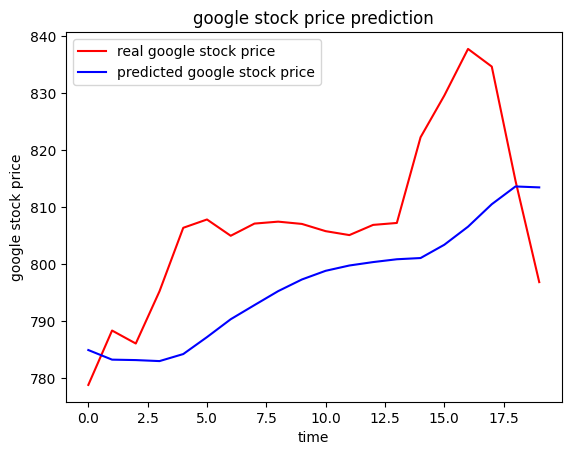

In [ ]:
predicted_stock_price=model.predict(x_test)
predicted_stock_price =sc.inverse_transform(predicted_stock_price)
import matplotlib.pyplot as plt
plt.plot(real_stock_price,color='red',label="real google stock price")
plt.plot(predicted_stock_price, color="blue",label='predicted google stock price')
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.legend()
plt.show()